   Sepal.Length  Sepal.width  Petal.length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


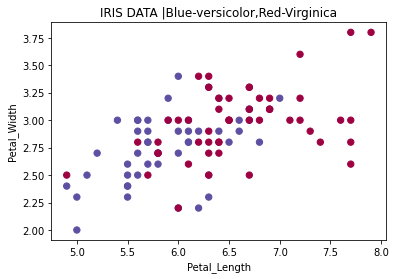

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('./Projects')
iris=pd.read_csv('./dataset/iris.csv')


print(iris.head())

iris.loc[iris['Species']=='virginica','Species']=0
iris.loc[iris['Species']=='versicolor','Species']=1
iris.loc[iris['Species']=='setosa','Species']=2
iris=iris[iris['Species']!=2]



X=iris[['Sepal.Length','Sepal.width']].values.T
Y=iris[['Species']].values.T
Y=Y.astype('uint8')


plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=40,cmap=plt.cm.Spectral);
plt.title("IRIS DATA |Blue-versicolor,Red-Virginica")
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()



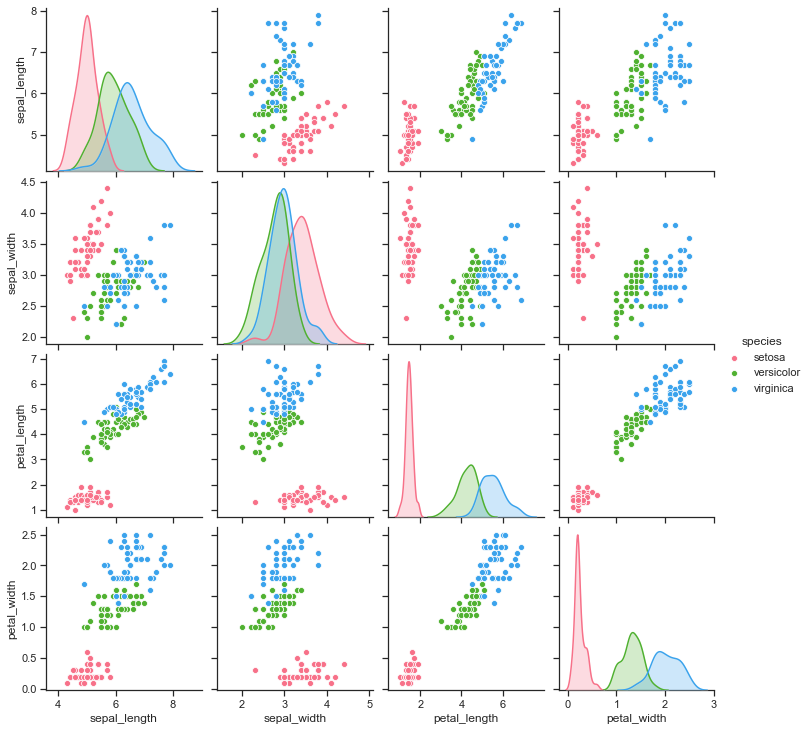

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks",color_codes=True)
iris=sns.load_dataset("iris")
g=sns.pairplot(iris,hue="species",palette="husl")

In [5]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

encoder=LabelEncoder()
y1=encoder.fit_transform(y)
Y=pd.get_dummies(y1).values

print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model=Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.2738 - accuracy: 0.3250 - val_loss: 1.0381 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 91us/step - loss: 1.0316 - accuracy: 0.5083 - val_loss: 0.9584 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 100us/step - loss: 0.9324 - accuracy: 0.6833 - val_loss: 0.9218 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 100us/step - loss: 0.8703 - accuracy: 0.6917 - val_loss: 0.8781 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 83us/step - loss: 0.8061 - accuracy: 0.6917 - val_loss: 0.8131 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 66us/step - loss: 0.7560 - accuracy: 0.6917 - val_loss: 0.7560 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 83us/step - loss: 0.7110 - accur

120/120 [==============================] - 0s 58us/step - loss: 0.1108 - accuracy: 0.9750 - val_loss: 0.1554 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 58us/step - loss: 0.1083 - accuracy: 0.9750 - val_loss: 0.1377 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 58us/step - loss: 0.1073 - accuracy: 0.9833 - val_loss: 0.1386 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 50us/step - loss: 0.1027 - accuracy: 0.9750 - val_loss: 0.1428 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 67us/step - loss: 0.1064 - accuracy: 0.9750 - val_loss: 0.1502 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 75us/step - loss: 0.1006 - accuracy: 0.9750 - val_loss: 0.1265 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 83us/step - loss: 0.0993 - accuracy: 0.9833 - val_loss: 0.1245 - val_accuracy: 1.000

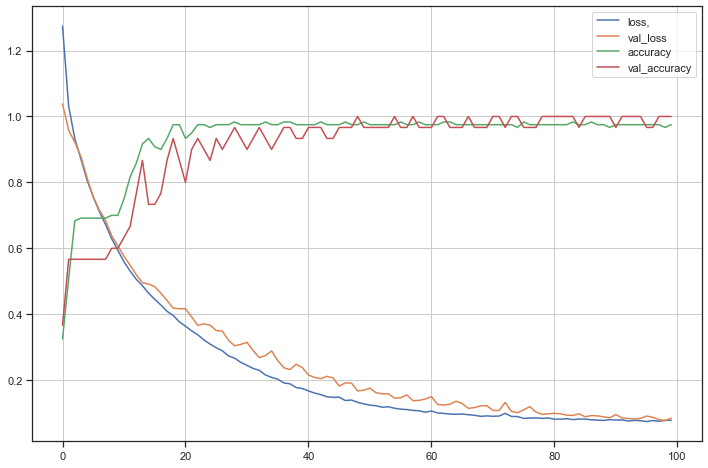

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss,','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()